In [1]:
from bs4 import BeautifulSoup
import os
import requests

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}
url = "https://www.transfermarkt.us/harry-kane/leistungsdatendetails/spieler/132098/saison//verein/0/liga/0/wettbewerb/GB1/pos/0/trainer_id/0"
response = requests.get(url,headers=headers)
response.text[:100] # Access the HTML with the text property
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
div = soup.findAll('div', class_='responsive-table')[1]

In [4]:
table = div.find('table')

In [5]:
print(table.prettify())

<table>
 <thead>
  <tr>
   <th class="zentriert">
    Matchday
   </th>
   <th class="zentriert">
    Date
   </th>
   <th class="zentriert">
    Venue
   </th>
   <th class="zentriert" colspan="2">
    For
   </th>
   <th colspan="2">
    Opponent
   </th>
   <th class="zentriert">
    Result
   </th>
   <th class="zentriert">
    Pos.
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-tor-table-header" title="Goals">
    </span>
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-vorlage-table-header" title="Assists">
    </span>
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-gelbekarte-table-header" title="Yellow cards">
    </span>
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-gelbrotekarte-table-header" title="Second yellow cards">
    </span>
   </th>
   <th class="zentriert">
    <span class="icons_sprite icon-rotekarte-table-header" title="Red cards">
    </span>
   </th>
   <th class="rechts">


In [6]:
            index=0 
            n_columns = 0
            n_rows=0
            column_names = []

In [7]:
            match=[]
            date=[]
            venue=[]
            forr=[]
            opp=[]
            result=[]
            pos=[]
            goal=[]
            assist=[]

            yellow=[]
            yellow2=[]
            red=[]
           
            play=[]

In [8]:
            # Find number of rows and columns
            # we also find the column titles if we can
            for row in table.find_all('tr'):
                
                # Determine the number of rows in the table
                td_tags = row.find_all('td')
                if len(td_tags) > 0:
                    n_rows+=1
                    if n_columns == 0:
                        # Set the number of columns for our table
                        n_columns = len(td_tags)
                        
                # Handle column names if we find them
                th_tags = row.find_all('th') 
                if len(th_tags) > 0 and len(column_names) == 0:
                    for th in th_tags:
                      try:
                         column_names.append( th.find('span')['title'] ) 
                      except: 
                       column_names.append(th.get_text())
    
            
            
    
            columns = column_names if len(column_names) > 0 else range(0,n_columns)
            df = pd.DataFrame(columns = columns,
                              index= range(0,n_rows))
            
            for row in table.find_all('tr'):
                
                columns = row.find_all('td')
                
                
                if len(columns) >=13: 

                   match.append(columns[0].get_text().strip())
                   date.append(columns[1].get_text().strip())
                   venue.append(columns[2].get_text().strip())
                   forr.append(columns[3].find('img', class_='tiny_wappen')['alt'].strip().split(' ')[0])
                   opp.append(columns[6].get_text().strip().split('(')[0])
                   result.append(columns[7].get_text().strip())
                   pos.append(columns[8].get_text().strip())
                   goal.append(columns[9].get_text().strip().split(' ')[0])
                   assist.append(columns[10].get_text().strip())
                   
                   yellow.append(columns[11].get_text().strip().split("'")[0])
                   yellow2.append(columns[12].get_text().strip().split("'")[0])
                   red.append(columns[13].get_text().strip().split("'")[0])
                   
                   play.append(columns[14].get_text().strip().split("'")[0])
                   

In [9]:
columns = column_names if len(column_names) > 0 else range(0,n_columns)
df = pd.DataFrame(columns = columns,
                              index= range(0,len(match)))


In [10]:
df['Matchday']=match
df['Assists']=assist

df['Date']=date
df['Red cards']=red
df['Yellow cards']=yellow
df['Minutes played']=play
df['Venue']=venue
df['For']=forr
df['Opponent']=opp
df['Goals']=goal
df['Pos.']=pos
df['Second yellow cards']=yellow2



df['Result']=result

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Matchday             214 non-null    object
 1   Date                 214 non-null    object
 2   Venue                214 non-null    object
 3   For                  214 non-null    object
 4   Opponent             214 non-null    object
 5   Result               214 non-null    object
 6   Pos.                 214 non-null    object
 7   Goals                214 non-null    object
 8   Assists              214 non-null    object
 9   Yellow cards         214 non-null    object
 10  Second yellow cards  214 non-null    object
 11  Red cards            214 non-null    object
 12  Minutes played       214 non-null    object
dtypes: object(13)
memory usage: 21.9+ KB


In [12]:
df['Yellow cards'].sum()


'8736909090407590906760723188505290682459819087835174'

In [13]:
df.to_csv ('compactMO',index=False)

**Change Goals to int and get sum**

In [14]:
#df_08['cyl'] = df_08['cyl'].str.extract('(\d+)').astype(int)
df['Goals']=df['Goals'].replace([''],'0')
df['Goals']=df['Goals'].astype(int)
df['Goals'].sum()




146

Convert Date to datetime

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matchday             214 non-null    object        
 1   Date                 214 non-null    datetime64[ns]
 2   Venue                214 non-null    object        
 3   For                  214 non-null    object        
 4   Opponent             214 non-null    object        
 5   Result               214 non-null    object        
 6   Pos.                 214 non-null    object        
 7   Goals                214 non-null    int64         
 8   Assists              214 non-null    object        
 9   Yellow cards         214 non-null    object        
 10  Second yellow cards  214 non-null    object        
 11  Red cards            214 non-null    object        
 12  Minutes played       214 non-null    object        
dtypes: datetime64[ns](1), int64(1), obj

Change Minute Played to int

In [17]:
df['Minutes played']=df['Minutes played'].replace([''],'0')
df['Minutes played']=df['Minutes played'].astype(int)

Change Matchday to int

In [18]:
df['Matchday']=df['Matchday'].replace([''],'0')
df['Matchday']=df['Matchday'].astype(int)

**Change assist to int and get sum**

In [19]:
df['Assists']=df['Assists'].replace([''],'0')
df['Assists']=df['Assists'].astype(int)
df['Assists'].sum()


30

Change Yellow cards to int


In [20]:
df['Yellow cards']=df['Yellow cards'].replace([''],'0')


In [21]:
df['Yellow cards']=df['Yellow cards'].astype(int)
df['Yellow cards'].values[df['Yellow cards'].values > 0] =1


df['Yellow cards'].sum()

26

In [22]:
df.head(20)


,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,1,2012-08-18,A,Tottenham,Newcastle,2:1,CF,0,0,0,,,5
1,4,2012-09-15,H,Norwich,West Ham,0:0,SS,0,0,0,,,19
2,20,2012-12-29,H,Norwich,Man City,3:4,,0,0,0,,,46
3,21,2013-01-01,A,Norwich,West Ham,2:1,CF,0,0,0,,,70
4,5,2013-09-22,A,Tottenham,Cardiff,0:1,LW,0,0,0,,,8
5,20,2014-01-01,A,Tottenham,Man Utd,1:2,CF,0,0,0,,,15
6,24,2014-02-01,A,Tottenham,Hull City,1:1,CF,0,0,0,,,1
7,28,2014-03-02,H,Tottenham,Cardiff,1:0,SS,0,0,0,,,7
8,33,2014-04-07,H,Tottenham,Sunderland,5:1,SS,1,1,0,,,90
9,34,2014-04-12,A,Tottenham,West Brom,3:3,SS,1,0,0,,,90


Change second Yellow cards to int

In [23]:
df['Second yellow cards']=df['Second yellow cards'].replace([''],'0')
df['Second yellow cards']=df['Second yellow cards'].astype(int)
df['Second yellow cards'].values[df['Second yellow cards'].values > 0] =1

In [24]:
df.head()

,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,1,2012-08-18,A,Tottenham,Newcastle,2:1,CF,0,0,0,0,,5
1,4,2012-09-15,H,Norwich,West Ham,0:0,SS,0,0,0,0,,19
2,20,2012-12-29,H,Norwich,Man City,3:4,,0,0,0,0,,46
3,21,2013-01-01,A,Norwich,West Ham,2:1,CF,0,0,0,0,,70
4,5,2013-09-22,A,Tottenham,Cardiff,0:1,LW,0,0,0,0,,8


Change Red Cards to int

In [25]:
df['Red cards']=df['Red cards'].replace([''],'0')
df['Red cards']=df['Red cards'].astype(int)
df['Red cards'].values[df['Red cards'].values > 0] =1

In [26]:
df.head()

,Matchday,Date,Venue,For,Opponent,Result,Pos.,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
0,1,2012-08-18,A,Tottenham,Newcastle,2:1,CF,0,0,0,0,0,5
1,4,2012-09-15,H,Norwich,West Ham,0:0,SS,0,0,0,0,0,19
2,20,2012-12-29,H,Norwich,Man City,3:4,,0,0,0,0,0,46
3,21,2013-01-01,A,Norwich,West Ham,2:1,CF,0,0,0,0,0,70
4,5,2013-09-22,A,Tottenham,Cardiff,0:1,LW,0,0,0,0,0,8


In [27]:
df['Pos.'].value_counts()

CF    197
SS     12
        4
LW      1
Name: Pos., dtype: int64


Change CF and SS and AM to ST.
Change ' ' to  RW




In [28]:
df['Pos.']=df['Pos.'].replace([''],'CF')
df['Pos.']=df['Pos.'].replace(['SS'],'CF')



In [29]:
df['Pos.'].value_counts()

CF    213
LW      1
Name: Pos., dtype: int64

Salah goals

In [30]:
df.groupby(['Opponent']).sum().sort_values(['Goals'],ascending=False)



,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played
Opponent,,,,,,,
Leicester,217,14,1,0,0,0,820
Arsenal,232,10,0,3,0,0,958
Southampton,232,10,6,0,0,0,969
West Ham,258,9,1,2,0,0,1020
Everton,182,9,0,0,0,0,980
Stoke City,198,9,1,1,0,0,763
Bournemouth,179,7,1,0,0,0,630
West Brom,178,7,0,1,0,0,628
Burnley,147,7,2,0,0,0,714





1.   Kane scored in every team he faced
2.   Salah Scored mostly  on  leicter then Arsenal and  Southampton









In [31]:
df[df['Venue'].values=='H'].groupby(['Venue','Opponent']).sum().sort_values(['Goals'],ascending=False)



Matchday  Goals  ...  Red cards  Minutes played
Venue Opponent                           ...                           
H     Leicester              126      7  ...          0             360
      Arsenal                179      6  ...          0             540
      West Ham               107      6  ...          0             469
      Stoke City              55      5  ...          0             330
      Southampton             86      5  ...          0             361
      West Brom               69      4  ...          0             270
      Bournemouth            105      4  ...          0             421
      Everton                101      4  ...          0             540
      Chelsea                 87      3  ...          0             540
      Sunderland              82      3  ...          0             355
      Burnley                 70      3  ...          0             444
      Aston Villa             82      3  ...          0             360
      Norwich                 18      2  ...          0              90
      Fulham                  37      2  ...          0             168
      Swansea                 74      2  ...          0             337
      Liverpool               26      2  ...          0             351
      Watford                102      1  ...          0             299
      Man City               106      1  ...          0             406
      Newcastle               62      1  ...          0             383
      Middlesbrough           24      1  ...          0              90
      Man Utd                166      1  ...          0             539
      Brighton                36      1  ...          0             180
      Wolves                  20      1  ...          0              90
      QPR                      2      0  ...          0              21
      Sheff Utd               12      0  ...          0              90
      Hull City               53      0  ...          0             164
      Huddersfield            29      0  ...          0              90
      Crystal Palace          70      0  ...          0             522
      Cardiff                 36      0  ...          0              97

[29 rows x 7 columns]

In [ ]:
df[df['Venue'].values=='A'].groupby(['Venue','Opponent']).sum().sort_values(['Goals'],ascending=False)

Matchday  Goals  ...  Red cards  Minutes played
Venue Opponent                           ...                           
A     Bournemouth             50      5  ...          0             251
      Brighton                71      3  ...          0             260
      West Ham                54      3  ...          0             270
      Aston Villa             15      2  ...          0             155
      Watford                 42      2  ...          0             262
      Stoke City              14      2  ...          0              23
      Southampton             62      2  ...          0             258
      Huddersfield            34      2  ...          0             173
      Arsenal                 66      1  ...          0             263
      West Brom               61      1  ...          0              85
      Spurs                   56      1  ...          0             288
      Newcastle               82      1  ...          0             183
      Wolves                  42      1  ...          0             175
      Leicester               29      1  ...          0             231
      Crystal Palace          74      1  ...          0             218
      Liverpool               36      0  ...          0              60
      Man Utd                 57      0  ...          0             169
      Norwich                 26      0  ...          0              90
      Sheff Utd                7      0  ...          0              90
      Fulham                  31      0  ...          0              90
      Everton                 29      0  ...          0              90
      Swansea                 58      0  ...          0             180
      Chelsea                 52      0  ...          0             336
      Cardiff                 73      0  ...          0             169
      Burnley                 19      0  ...          0             114
      Man City                57      0  ...          0             225

[26 rows x 7 columns]

kane never scored on Man city,Chelsea and Everton pitch


In [37]:
df.groupby(['Matchday']).sum().sort_values(['Goals'],ascending=False)

,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Matchday,,,,,,,
20,7,2,2,0,0,601,52
19,7,2,0,0,0,514,61
34,7,3,0,0,0,540,28
38,7,1,0,0,0,524,32
4,6,1,0,0,0,548,72
27,6,0,0,0,0,444,12
24,6,0,1,0,0,361,9
18,6,0,1,0,0,533,72
30,6,0,0,0,0,394,18


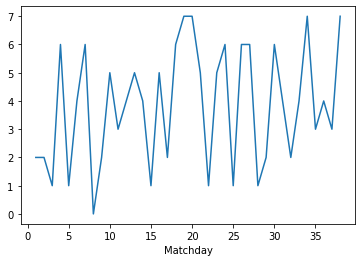

In [38]:
dfmatch=df.groupby(['Matchday'])['Goals'].sum()
dfmatch.plot(x ='Matchday', y='Goals', kind = 'line')
plt.show()


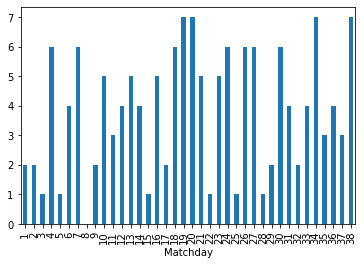

In [39]:
dfmatch.plot(x ='Matchday', y='Goals', kind = 'bar')
plt.show()

Kane never scored in round 8

> Indented block



> Indented block


Kane Most scored @ round 20,19,34,38 with 7 goals

In [40]:
df.groupby(df['Date'].dt.strftime('%B')).sum().sort_values(['Goals'],ascending=False)

,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Date,,,,,,,,
December,613,27,4,4,0,0,3077,432
January,497,16,5,2,0,0,1875,23
September,112,16,6,1,0,0,1798,207
February,412,15,2,4,0,0,1340,32
March,437,14,1,0,0,0,1197,45
November,257,14,0,3,0,0,1787,231
May,583,13,2,2,0,0,1362,80
April,731,12,5,3,0,0,1817,88
October,118,8,2,1,0,0,1079,140


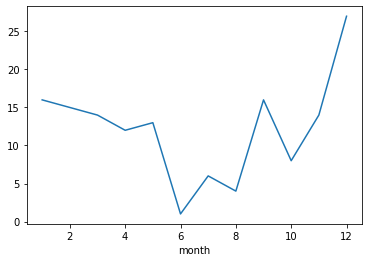

In [41]:

df['month'] = pd.DatetimeIndex(df['Date']).month
df2=df.groupby(df['month'])['Goals'].sum()
df2.plot(x ='month', y='Goals', kind = 'line')
plt.show()


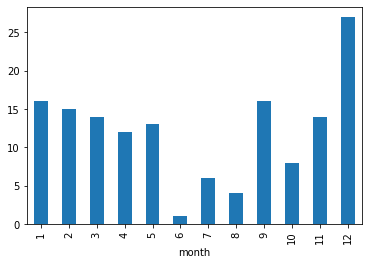

In [42]:
df2.plot(x ='month', y='Goals', kind = 'bar')
plt.show()

Salah scored in all months and mainly and December and November

In [43]:
df.groupby(df['Date'].dt.strftime('%d')).sum().sort_values(['Goals'],ascending=False)

,Matchday,Goals,Assists,Yellow cards,Second yellow cards,Red cards,Minutes played,month
Date,,,,,,,,
26,251,13,2,2,0,0,990,107
23,149,12,0,3,0,0,719,64
02,285,9,0,1,0,0,961,83
21,120,8,1,0,0,0,439,19
18,105,8,1,1,0,0,526,57
07,133,8,2,2,0,0,450,25
19,173,7,0,0,0,0,619,54
13,179,6,0,1,0,0,1001,78
22,80,6,1,0,0,0,546,61


Salah never scored on  day 15,28,6

Minutes/goal for liverpool


In [49]:
#df['Second yellow cards'].values[df['Second yellow cards'].values > 0] =1
df['Minutes played'].values[df['For']=='Tottenham'].sum()/df['Goals'].values[df['For']=='Tottenham'].sum()






119.4931506849315

Minutes/goal

In [45]:
df['Minutes played'].sum()/df['Goals'].sum()

120.41780821917808

In [46]:
df.to_csv ('compactMO',index=False)

In [ ]:
df.groupby(['Matchday']).sum().sort_values(['Matchday'])

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Matchday             214 non-null    int64         
 1   Date                 214 non-null    datetime64[ns]
 2   Venue                214 non-null    object        
 3   For                  214 non-null    object        
 4   Opponent             214 non-null    object        
 5   Result               214 non-null    object        
 6   Pos.                 214 non-null    object        
 7   Goals                214 non-null    int64         
 8   Assists              214 non-null    int64         
 9   Yellow cards         214 non-null    int64         
 10  Second yellow cards  214 non-null    int64         
 11  Red cards            214 non-null    int64         
 12  Minutes played       214 non-null    int64         
 13  month                214 non-null  